# TensorFlow Introduction

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [ ]:
!pip install tensorflow matplotlib -q

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

2025-04-29 06:19:05.638204: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-29 06:19:05.810444: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-29 06:19:07.332121: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-29 06:19:08.648109: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745907549.640085   13077 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745907549.93

TensorFlow version: 2.19.0


## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

> MNIST is a dataset of handwritten digits

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Build a machine learning model

Build a `tf.keras.Sequential` model:

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

/workspaces/InterviewPrep/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-04-29 06:19:47.923542: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [5]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.6537857 , -0.53978986, -0.4004222 ,  1.3424081 ,  0.65609694,
         0.05181519, -0.64898396, -0.06531936, -0.51628107, -0.25859043]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

In [6]:
tf.nn.softmax(predictions).numpy()

array([[0.04558092, 0.0510847 , 0.05872425, 0.33552048, 0.16891098,
        0.09230423, 0.04580031, 0.08210143, 0.05229987, 0.0676728 ]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [8]:
loss_fn(y_train[:1], predictions).numpy()

np.float32(2.3826652)

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [9]:
from datetime import datetime

In [10]:
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [11]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [12]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8612 - loss: 0.4786
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9557 - loss: 0.1500
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9665 - loss: 0.1087
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9733 - loss: 0.0850
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9767 - loss: 0.0735


The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [15]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9766 - loss: 0.0739


[0.07392609119415283, 0.9765999913215637]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [16]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [17]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[5.65992089e-08, 3.87021366e-08, 3.78810296e-06, 5.52849524e-05,
        4.21472468e-10, 9.71451414e-07, 1.75047444e-12, 9.99937296e-01,
        1.59201132e-08, 2.61789614e-06],
       [1.01295186e-07, 2.90937792e-03, 9.96897340e-01, 8.87481146e-05,
        3.34573433e-13, 6.99902594e-05, 1.00429406e-05, 3.87817599e-12,
        2.43203431e-05, 5.43350920e-10],
       [1.26659003e-07, 9.98297155e-01, 1.81505180e-04, 9.88295324e-06,
        1.36902410e-04, 1.13523041e-04, 1.22717829e-04, 6.05479290e-04,
        5.30213525e-04, 2.52827635e-06],
       [9.99254763e-01, 2.21556515e-08, 4.33687928e-05, 1.42350860e-08,
        3.04370155e-06, 8.55526105e-06, 2.38742999e-04, 4.50091698e-04,
        2.81959291e-08, 1.37569282e-06],
       [1.61450976e-06, 8.06664158e-09, 3.39106964e-06, 8.22571522e-08,
        9.96854007e-01, 1.13056572e-07, 7.43722410e-07, 1.05679428e-05,
        1.03572108e-06, 3.12844967e-03]], dtype=float32)>

### A Practical example

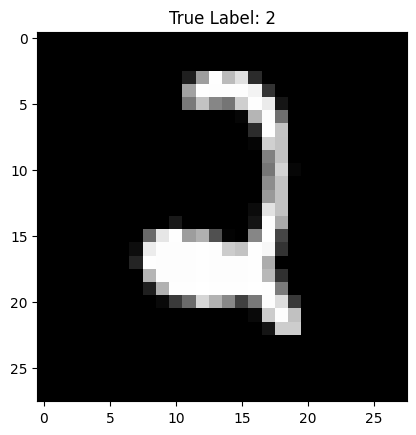

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Pick a random image from the test set
index = np.random.randint(0, len(x_test))  # Random index
input_digit = x_test[index]  # The image
true_label = y_test[index]   # The true label

# Display the image
plt.imshow(input_digit, cmap='gray')
plt.title(f"True Label: {true_label}")
plt.show()

In [19]:
# Add batch dimension (model expects input shape [batch_size, 28, 28])
input_digit_batch = np.expand_dims(input_digit, axis=0)
print("Input shape:", input_digit_batch.shape)  # Should be (1, 28, 28)

Input shape: (1, 28, 28)


In [20]:
# Get predictions (logits)
logits = model(input_digit_batch)

# Convert logits to probabilities using softmax
probabilities = tf.nn.softmax(logits).numpy()

# Get the predicted class (the class with the highest probability)
predicted_class = np.argmax(probabilities)

print("Probabilities:", probabilities)
print("Predicted Class:", predicted_class)
print("True Label:", true_label)

Probabilities: [[4.6511968e-08 1.4046738e-09 9.9799180e-01 5.2889104e-06 9.3073453e-07
  6.0895741e-07 1.9993039e-03 1.2658188e-09 1.9474969e-06 9.0090708e-09]]
Predicted Class: 2
True Label: 2


In [21]:
# Print probabilities for each class
for i, prob in enumerate(probabilities[0]):
    print(f"Class {i}: {prob * 100:.2f}%")

# Check if the prediction is correct
if predicted_class == true_label:
    print("Correct Prediction!")
else:
    print("Incorrect Prediction!")

Class 0: 0.00%
Class 1: 0.00%
Class 2: 99.80%
Class 3: 0.00%
Class 4: 0.00%
Class 5: 0.00%
Class 6: 0.20%
Class 7: 0.00%
Class 8: 0.00%
Class 9: 0.00%
Correct Prediction!


#### Save & Load the model

In [ ]:
# Save the model
model.save("./mnist_model.keras")
print("Model saved as mnist_model.keras")

In [ ]:
# Load the model
loaded_model = tf.keras.models.load_model("./mnist_model.keras")
print("Model loaded successfully!")

# Verify the loaded model by making a prediction
loaded_logits = loaded_model(input_digit_batch)
loaded_probabilities = tf.nn.softmax(loaded_logits).numpy()
loaded_predicted_class = np.argmax(loaded_probabilities)

print("Loaded Model Prediction:", loaded_predicted_class)
print("True Label:", true_label)